# First Model: Credit Score Prediction - Regression Model

## 🎯 Objective
This model predicts an applicant’s **credit score** (e.g., a numerical value in the range 300–850) using their demographic and financial attributes. It is designed to support automated decision-making in lending processes by providing a fast, data-driven score estimate.

---

## 📊 Dataset
- **Source**: `loan_data.csv`  
- **Target variable**: `credit_score` (numeric)  
- **Train/Test split**: 80% train / 20% test (random_state=42)

---

## 🔍 Features

| Type        | Feature Name                    | Description                                             |
|-------------|---------------------------------|---------------------------------------------------------|
| **Numeric** | `person_age`                    | Applicant’s age                                         |
| **Numeric** | `person_income`                 | Annual income (USD)                                     |
| **Numeric** | `person_emp_exp`                | Years of employment                                     |
| **Numeric** | `loan_amnt`                     | Requested loan amount                                   |
| **Numeric** | `loan_int_rate`                 | Interest rate (%)                                       |
| **Numeric** | `loan_percent_income`           | Loan amount as a percentage of income                   |
| **Numeric** | `cb_person_cred_hist_length`    | Length of credit history (years)                        |
| **Categorical** | `person_gender`             | Gender (`female` / `male`)                              |
| **Categorical** | `person_education`          | Education level (`High School`, `Bachelor`, etc.)       |
| **Categorical** | `person_home_ownership`     | Home ownership status (`RENT`, `OWN`, `MORTGAGE`, etc.)|
| **Categorical** | `loan_intent`               | Purpose of loan (`PERSONAL`, `EDUCATION`, etc.)         |
| **Categorical** | `previous_loan_defaults_on_file` | Prior default flag (`Yes` / `No`)                |

---


# 🎯Import of necessary libraries

In [52]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load Data

In [53]:
data = pd.read_csv("loan_data.csv")

In [54]:
data.drop("loan_status", axis=1, inplace=True)
data.head(15)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No


# data range for credit score

In [55]:
data["credit_score"].max()

850

In [56]:
data["credit_score"].min()

390

# converts columns containing strings in data to numeric data - (pd.get_dummies)


In [57]:
data_one_hot = pd.get_dummies(data,dtype=int)
data_one_hot.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_female,person_gender_male,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,0,...,0,1,0,0,0,0,1,0,1,0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,0,...,1,0,0,1,0,0,0,0,0,1
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,0,...,0,0,0,0,0,1,0,0,1,0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,0,...,0,1,0,0,0,1,0,0,1,0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,0,1,...,0,1,0,0,0,1,0,0,1,0


In [58]:
# shape
data_one_hot.shape

(45000, 27)

In [59]:
#Create X and y values
X = data_one_hot.drop("credit_score", axis=1)
y = data_one_hot["credit_score"]

In [60]:
X.shape # features

(45000, 26)

In [61]:
y.shape # labels

(45000,)

In [62]:
X.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_gender_female,person_gender_male,person_education_Associate,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [63]:
y.head()

0    561
1    504
2    635
3    675
4    586
Name: credit_score, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split

# %80 train - %20 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
print(f"X_train shape = {X_train.shape}")
print(f"X_test shape = {X_test.shape}")
print(f"y_train shape = {y_train.shape}")
print(f"y_test shape = {y_test.shape}")

X_train shape = (36000, 26)
X_test shape = (9000, 26)
y_train shape = (36000,)
y_test shape = (9000,)


### 🧬 First Simple Model - Model - 1

In [15]:
# Create first simple model - first test

#set random seed
tf.random.set_seed(42)

# Create a new model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(26,)),  # features = 26
    tf.keras.layers.Flatten(), # one-dimensional vectorization
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1) #26 future 1 predict - output layer
])

# compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["mae"])

# fit the model
history_1 = model_1.fit(tf.expand_dims(X_train, axis=2), y_train, epochs=100)

Epoch 1/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - loss: 49569.1172 - mae: 49569.1172
Epoch 2/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - loss: 631.0112 - mae: 631.0112
Epoch 3/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - loss: 629.8862 - mae: 629.8862
Epoch 4/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - loss: 628.7613 - mae: 628.7613
Epoch 5/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - loss: 627.6364 - mae: 627.6364
Epoch 6/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step - loss: 626.5114 - mae: 626.5114
Epoch 7/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - loss: 625.3865 - mae: 625.3865
Epoch 8/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - loss: 624.2614 - mae: 624.2614
Epoch 9/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - loss: 623.1360 - mae: 623.1360
Epoch 10/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - loss: 622.0104 - mae: 622.0104
Epoch 11/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - loss: 620.8849 - mae: 620.8849
Epoc

In [16]:
model_1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 26)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 507 (1.98 KB)

 Trainable params: 505 (1.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Model_1 predict

In [17]:
# Predict Model-1
y_preds = model_1.predict(X_test).squeeze()
y_preds

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step


array([112.44777, 112.44777, 112.44777, ..., 112.44777, 112.44777,
       112.44777], dtype=float32)

In [18]:
print(f"X_train shape = {X_train.shape}")
print(f"X_test shape = {X_test.shape}")
print(f"y_train shape = {y_train.shape}")
print(f"y_test shape = {y_test.shape}")
print(f"y_preds shape = {y_preds.shape}")

X_train shape = (36000, 26)
X_test shape = (9000, 26)
y_train shape = (36000,)
y_test shape = (9000,)
y_preds shape = (9000,)


In [19]:
len(X_train)

36000

In [20]:
len(X_test), len(y_test)


(9000, 9000)

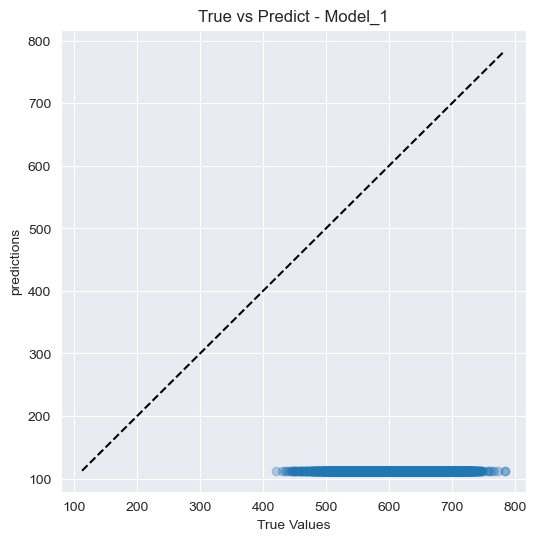

In [21]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_preds, alpha=0.3)
mn = min(y_test.min(), y_preds.min())
mx = max(y_test.max(), y_preds.max())
plt.plot([mn,mx], [mn,mx], 'k--')
plt.xlabel("True Values")
plt.ylabel("predictions")
plt.title("True vs Predict - Model_1")
plt.show()

In [22]:
y_test

37979    601
9911     647
43386    711
13822    597
44810    586
        ... 
14572    654
30384    606
36665    614
30569    695
5321     635
Name: credit_score, Length: 9000, dtype: int64

In [23]:
y_preds

array([112.44777, 112.44777, 112.44777, ..., 112.44777, 112.44777,
       112.44777], dtype=float32)

In [24]:
model_1.evaluate(X_test,y_test)

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 520.2029 - mae: 520.2029


[520.0740966796875, 520.0740966796875]

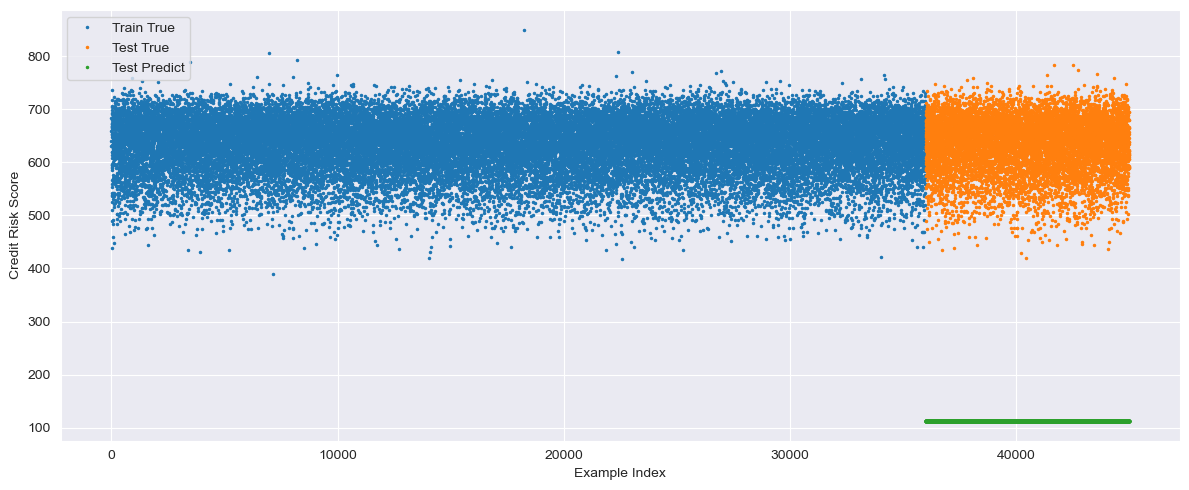

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 2) İndeksleri oluştur
n_train    = len(y_train)
n_test     = len(y_test)
idx_train  = np.arange(n_train)
idx_test   = np.arange(n_train, n_train + n_test)

# 3) Çiz
plt.figure(figsize=(12,5))
plt.plot(idx_train, y_train,  '.', markersize=3, label='Train True')
plt.plot(idx_test,  y_test,   '.', markersize=3, label='Test True')
plt.plot(idx_test,  y_preds,  '.', markersize=3, label='Test Predict')
plt.xlabel("Example Index")
plt.ylabel("Credit Risk Score")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [26]:
print(f"X_train shape = {X_train.shape}")
print(f"X_test shape = {X_test.shape}")
print(f"y_train shape = {y_train.shape}")
print(f"y_test shape = {y_test.shape}")

X_train shape = (36000, 26)
X_test shape = (9000, 26)
y_train shape = (36000,)
y_test shape = (9000,)


In [27]:
X_train

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_gender_female,person_gender_male,person_education_Associate,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
25180,34.0,97265.0,11,15000.0,12.73,0.15,9.0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
12555,25.0,72953.0,3,12000.0,11.86,0.16,4.0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
29153,41.0,322597.0,18,24000.0,10.37,0.07,11.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
23838,27.0,94232.0,4,9600.0,17.14,0.10,7.0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
35686,27.0,84873.0,7,7059.0,12.97,0.08,3.0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,26.0,88451.0,6,10625.0,6.03,0.12,4.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
44732,25.0,34772.0,3,5876.0,11.69,0.17,4.0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
38158,33.0,58317.0,9,10707.0,10.74,0.18,9.0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
860,26.0,178602.0,6,20000.0,17.99,0.11,3.0,0,1,0,...,0,1,1,0,0,0,0,0,1,0


### 🧬 Second Model - Model - 2

In [28]:
# create model_2

# set random seed
tf.random.set_seed(42)

# add an extra neuron
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(26,)),      

    tf.keras.layers.Flatten(),               # → (None,26)  

    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1) # output layer
])

#compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#fit he model and save history_2
history_2 = model_2.fit(tf.expand_dims(X_train, axis=2), y_train, epochs=100)

Epoch 1/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 748us/step - loss: 337.6722 - mae: 337.6722
Epoch 2/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - loss: 217.5293 - mae: 217.5293
Epoch 3/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - loss: 173.1227 - mae: 173.1227
Epoch 4/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - loss: 144.8477 - mae: 144.8477
Epoch 5/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - loss: 119.2168 - mae: 119.2168
Epoch 6/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - loss: 110.7400 - mae: 110.7400
Epoch 7/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - loss: 99.3900 - mae: 99.3900
Epoch 8/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - loss: 101.4619 - mae: 101.4619
Epoch 9/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - loss: 92.6971 - mae: 92.6971
Epoch 10/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - loss: 84.2964 - mae: 84.2964
Epoch 11/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - loss: 84.4678 - mae: 84.4678
Epoch 12/100
112

### 💪 Compare model_1 & model_2

In [29]:
model_2.evaluate(X_test,y_test)

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 59.8763 - mae: 59.8763


[60.16474914550781, 60.16474914550781]

In [30]:
model_1.evaluate(X_test,y_test)

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 520.2029 - mae: 520.2029


[520.0740966796875, 520.0740966796875]

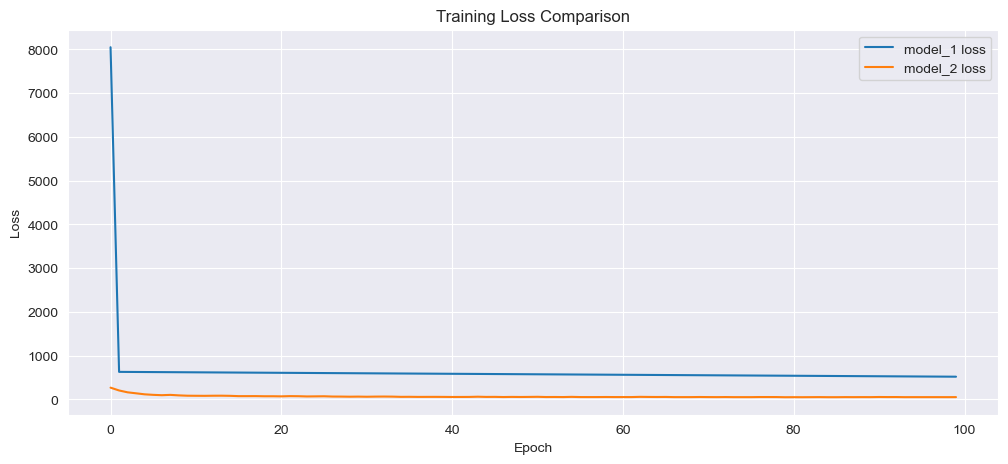

In [31]:
plt.figure(figsize=(12,5))
plt.plot(history_1.history["loss"], label="model_1 loss")
plt.plot(history_2.history["loss"], label="model_2 loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss Comparison")
plt.show()

Text(0.5, 1.0, 'Training MAE Comparison')

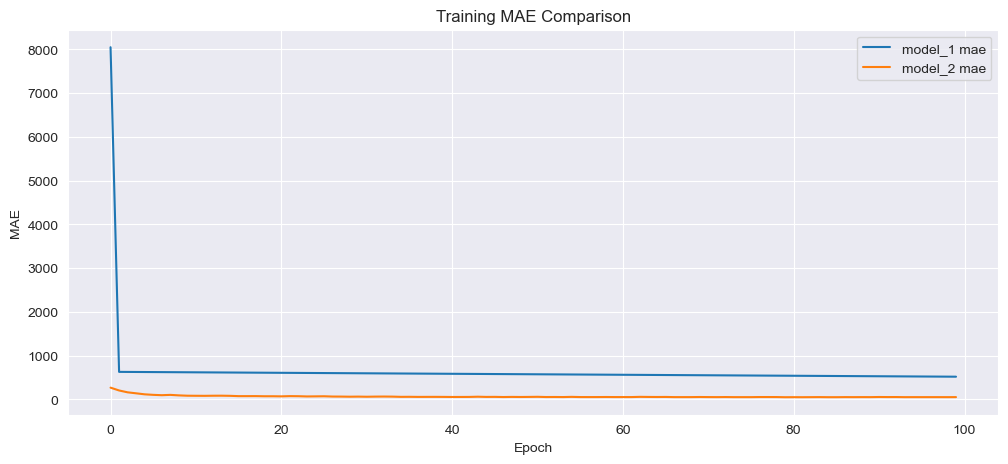

In [32]:
plt.figure(figsize=(12,5))
plt.plot(history_1.history["mae"], label="model_1 mae")
plt.plot(history_2.history["mae"], label="model_2 mae")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.title("Training MAE Comparison")

### Model_2 predict

In [34]:
y_preds_2 = model_2.predict(X_test).squeeze()
y_preds_2

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step


array([680.86084, 592.3383 , 657.7105 , ..., 694.65784, 662.25616,
       663.02606], dtype=float32)

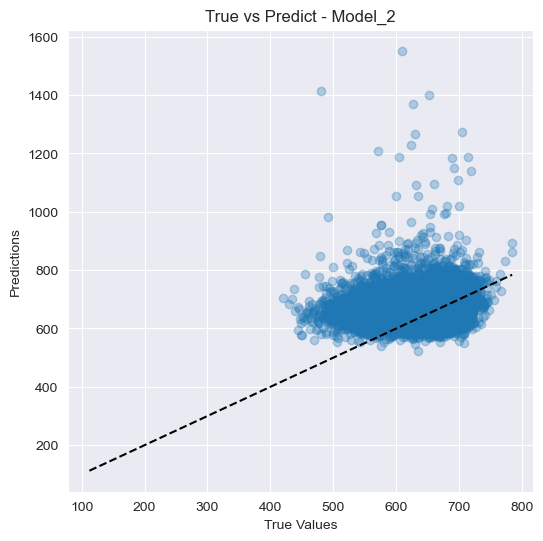

In [35]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_preds_2, alpha=0.3)
mn = min(y_test.min(), y_preds.min())
mx = max(y_test.max(), y_preds.max())
plt.plot([mn,mx], [mn,mx], 'k--')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predict - Model_2")
plt.show()

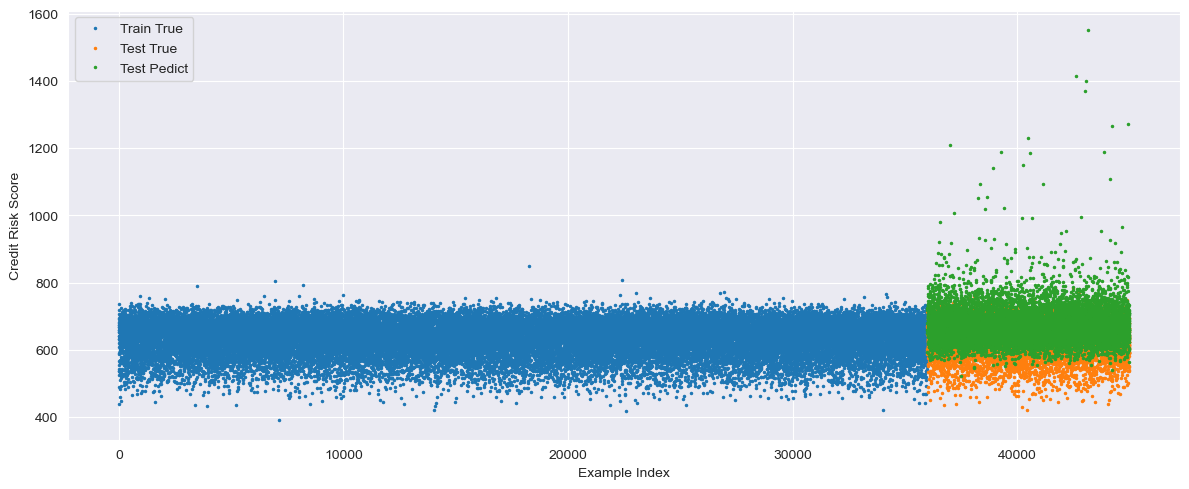

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# 2) İndeksleri oluştur
n_train    = len(y_train)
n_test     = len(y_test)
idx_train  = np.arange(n_train)
idx_test   = np.arange(n_train, n_train + n_test)

# 3) Çiz
plt.figure(figsize=(12,5))
plt.plot(idx_train, y_train,  '.', markersize=3, label='Train True')
plt.plot(idx_test,  y_test,   '.', markersize=3, label='Test True')
plt.plot(idx_test,  y_preds_2,  '.', markersize=3, label='Test Pedict')
plt.xlabel("Example Index")
plt.ylabel("Credit Risk Score")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 🧬 Third Model - Model - 3

In [37]:
#create the model 3

# set random seed
tf.random.set_seed(42)

#create the model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(26,)),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

#compile the model

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# fit the model

history_3 = model_3.fit(tf.expand_dims(X_train, axis=2), y_train, epochs=150)

Epoch 1/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 764us/step - loss: 934.5878 - mae: 934.5878
Epoch 2/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - loss: 631.0507 - mae: 631.0507
Epoch 3/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - loss: 629.9254 - mae: 629.9254
Epoch 4/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - loss: 628.8002 - mae: 628.8002
Epoch 5/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - loss: 627.6753 - mae: 627.6753
Epoch 6/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - loss: 626.5504 - mae: 626.5504
Epoch 7/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - loss: 625.4255 - mae: 625.4255
Epoch 8/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - loss: 624.3005 - mae: 624.3005
Epoch 9/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - loss: 623.1750 - mae: 623.1750
Epoch 10/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - loss: 622.0496 - mae: 622.0496
Epoch 11/150
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - loss: 620.9242 - mae: 620.9242
Epoch 12

### 💪 Compare Model_1 & Model_2 & Model_3

In [67]:
model_1.evaluate(X_test,y_test)     #loss = 520

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 520.2002 - mae: 520.2002


[520.0701293945312, 520.0701293945312]

In [68]:
model_2.evaluate(X_test,y_test)     #loss = 46.5

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 46.5838 - mae: 46.5838


[46.49998092651367, 46.49998092651367]

In [69]:
model_3.evaluate(X_test,y_test)     #loss = 45.6 

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 45.6252 - mae: 45.6252


[45.55644607543945, 45.55644607543945]

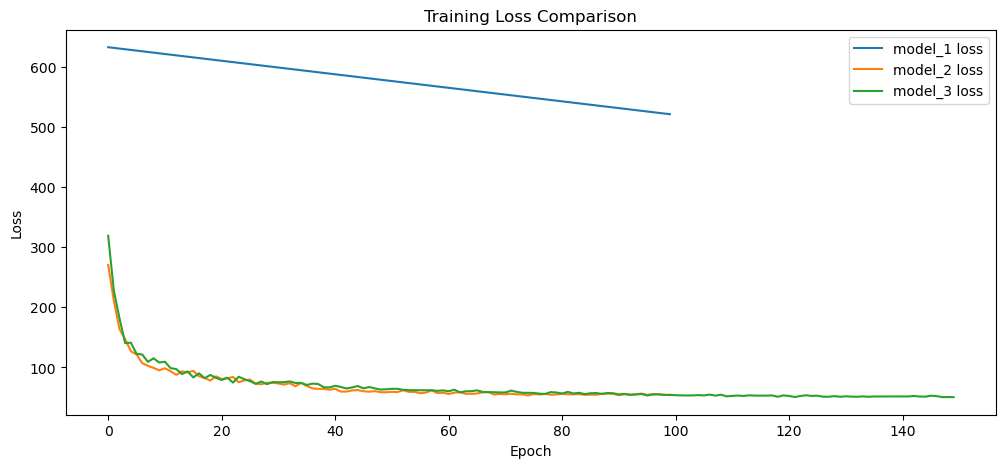

In [70]:
plt.figure(figsize=(12,5))
plt.plot(history_1.history["loss"], label="model_1 loss")
plt.plot(history_2.history["loss"], label="model_2 loss")
plt.plot(history_3.history["loss"], label="model_3 loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss Comparison")
plt.show()

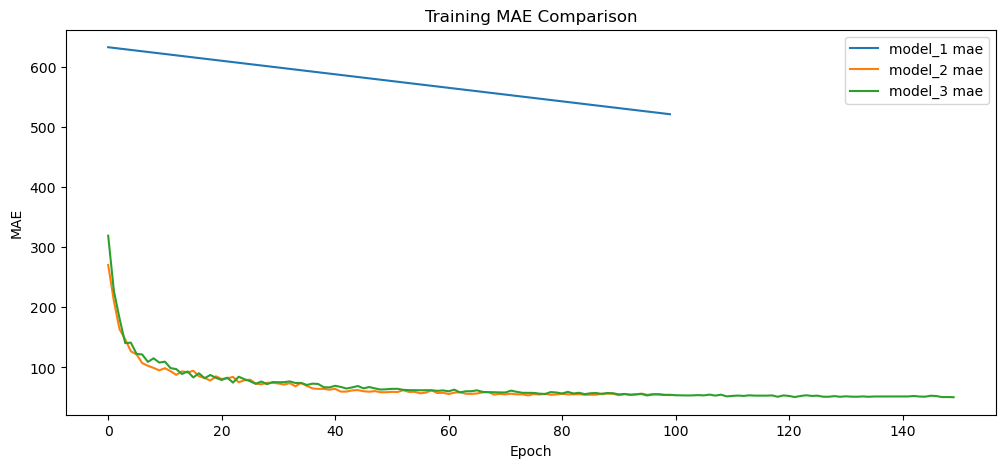

In [71]:
plt.figure(figsize=(12,5))
plt.plot(history_1.history["mae"], label="model_1 mae")
plt.plot(history_2.history["mae"], label="model_2 mae")
plt.plot(history_3.history["mae"], label="model_3 mae")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.title("Training MAE Comparison")
plt.show()

### Model_3 predict

In [66]:
y_preds_3 = model_3.predict(X_test).squeeze()
y_preds_3

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step


array([168.93803, 168.93803, 168.93803, ..., 168.93803, 168.93803,
       168.93803], dtype=float32)

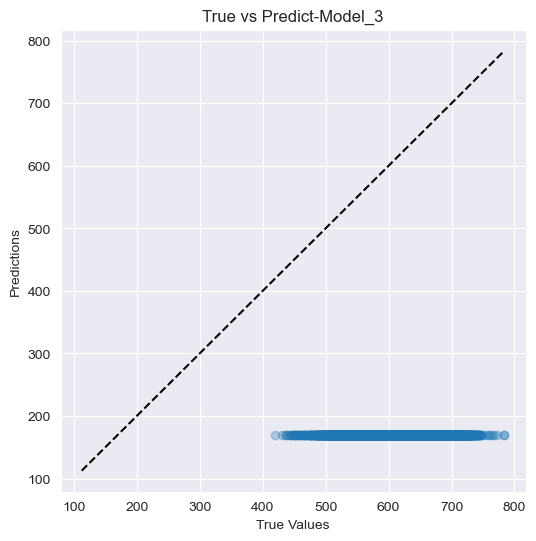

In [68]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_preds_3, alpha=0.3)
mn = min(y_test.min(), y_preds.min())
mx = max(y_test.max(), y_preds.max())
plt.plot([mn,mx], [mn,mx], 'k--')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predict-Model_3")
plt.show()

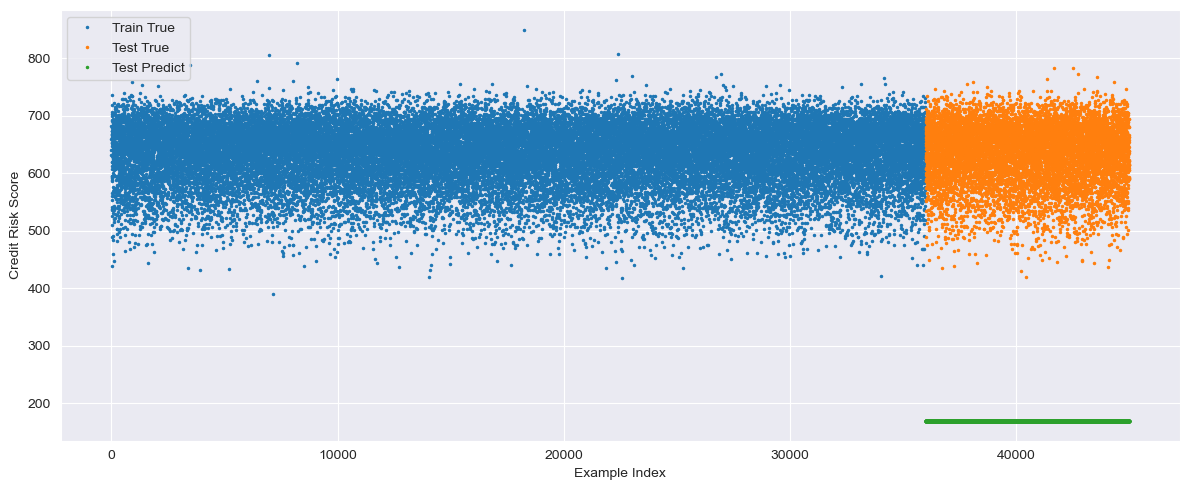

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# 2) İndeksleri oluştur
n_train    = len(y_train)
n_test     = len(y_test)
idx_train  = np.arange(n_train)
idx_test   = np.arange(n_train, n_train + n_test)

# 3) Çiz
plt.figure(figsize=(12,5))
plt.plot(idx_train, y_train,  '.', markersize=3, label='Train True')
plt.plot(idx_test,  y_test,   '.', markersize=3, label='Test True')
plt.plot(idx_test,  y_preds_3,  '.', markersize=3, label='Test Predict')
plt.xlabel("Example Index")
plt.ylabel("Credit Risk Score")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

###  ⏩ Preprocessing data (normalization and standardization)


In [70]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No


In [71]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["person_age", "person_income","person_emp_exp","loan_amnt","loan_int_rate","loan_percent_income","cb_person_cred_hist_length"]),
    (OneHotEncoder(handle_unknown="ignore"), ["person_gender", "person_education","person_home_ownership","loan_intent","previous_loan_defaults_on_file"])
)

# create X & y
X = data.drop("credit_score", axis=1)
y = data["credit_score"]

#build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit column transformer on the training data only
ct.fit(X_train)

X_train_normalized = ct.transform(X_train)
X_test_normalized = ct.transform(X_test)

In [72]:
X_train.loc[0]


person_age                            22.0
person_gender                       female
person_education                    Master
person_income                      71948.0
person_emp_exp                           0
person_home_ownership                 RENT
loan_amnt                          35000.0
loan_intent                       PERSONAL
loan_int_rate                        16.02
loan_percent_income                   0.49
cb_person_cred_hist_length             3.0
previous_loan_defaults_on_file          No
Name: 0, dtype: object

In [73]:
X_train_normalized[0]

array([0.11290323, 0.01241039, 0.088     , 0.42028986, 0.50137174,
       0.23809524, 0.25      , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        ])

In [74]:
X_train_normalized.shape,X_train.shape

((36000, 26), (36000, 12))

Our data is normalized and numerical, let's model it.

We'll use the same model as insurance_model_3.

### 🧬 Scaled Model - Model - 4

In [123]:
#create the model 4 with normalized data
from tensorflow.keras.layers import (
    Input, Dense, BatchNormalization, Dropout
)


# set random seed
tf.random.set_seed(42)

#create the model

model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(26,)),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(256, activation="relu"),

    BatchNormalization(),

    tf.keras.layers.Dense(128, activation="relu"),
    
    BatchNormalization(),

    tf.keras.layers.Dense(64, activation="relu"),
    
    BatchNormalization(), 
    
    tf.keras.layers.Dense(16, activation="relu"),

    BatchNormalization(),

    tf.keras.layers.Dense(4, activation="relu"),
    
    tf.keras.layers.Dense(1)
])

#compile the model

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9,nesterov=True),
                metrics=["mae"])

# fit the model

history_4 = model_4.fit(tf.expand_dims(X_train_normalized, axis=2), y_train, epochs=30,batch_size=64)

Epoch 1/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 400.2841 - mae: 400.2841
Epoch 2/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 39.0706 - mae: 39.0706
Epoch 3/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 38.7063 - mae: 38.7063
Epoch 4/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 38.5838 - mae: 38.5838
Epoch 5/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 38.4724 - mae: 38.4724
Epoch 6/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 38.3510 - mae: 38.3510
Epoch 7/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 38.3161 - mae: 38.3161
Epoch 8/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 38.2472 - mae: 38.2472
Epoch 9/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 38.1962 - mae: 38.1962
Epoch 10/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 38.1550 - mae: 38.1550
Epoch 11/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 38.0946 - mae: 38.0946
Epoch 12/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 38.0415 - mae: 38.0415

### 💪 Compara Model-1 & Model-2 & Model-3 & Model-4

In [124]:
model_4.evaluate(X_test_normalized,y_test)

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 39.1325 - mae: 39.1325


[38.98340606689453, 38.98340606689453]

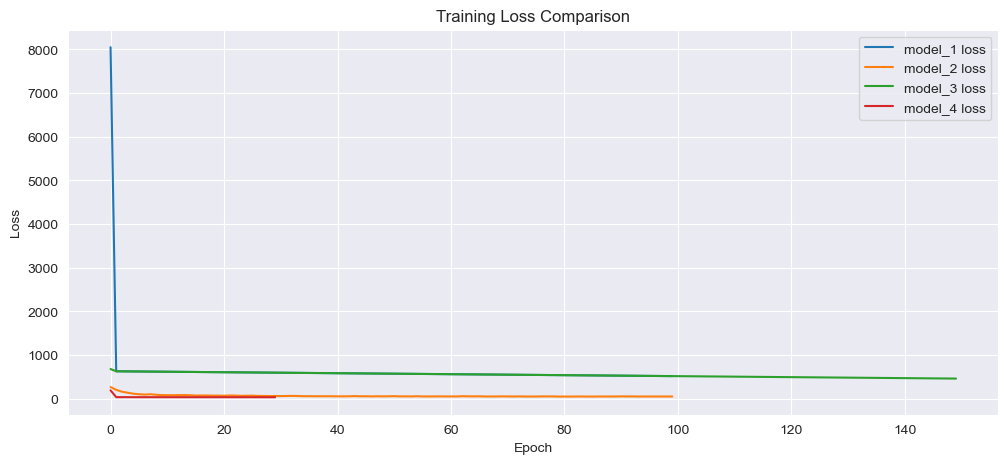

In [125]:
plt.figure(figsize=(12,5))
plt.plot(history_1.history["loss"], label="model_1 loss")
plt.plot(history_2.history["loss"], label="model_2 loss")
plt.plot(history_3.history["loss"], label="model_3 loss")
plt.plot(history_4.history["loss"], label="model_4 loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss Comparison")
plt.show()

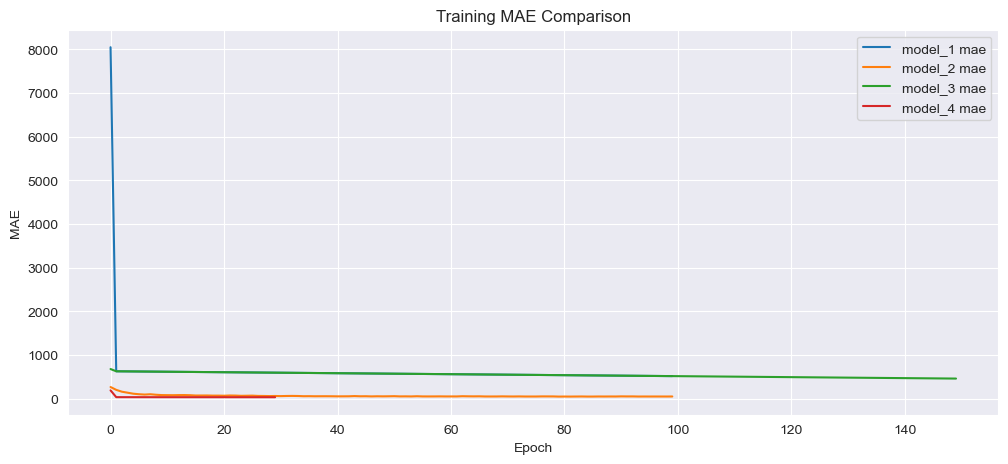

In [126]:
plt.figure(figsize=(12,5))
plt.plot(history_1.history["mae"], label="model_1 mae")
plt.plot(history_2.history["mae"], label="model_2 mae")
plt.plot(history_3.history["mae"], label="model_3 mae")
plt.plot(history_4.history["mae"], label="model_4 mae")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.title("Training MAE Comparison")
plt.show()

### Model-4 Predict

In [127]:
y_preds_4 = model_4.predict(X_test_normalized).squeeze()
y_preds_4

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step


array([675.0129 , 633.24054, 646.8633 , ..., 651.7984 , 667.24255,
       626.3845 ], dtype=float32)

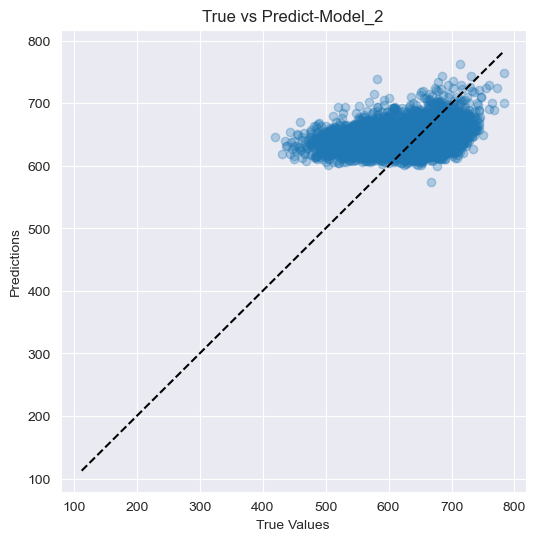

In [128]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_preds_4, alpha=0.3)
mn = min(y_test.min(), y_preds.min())
mx = max(y_test.max(), y_preds.max())
plt.plot([mn,mx], [mn,mx], 'k--')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predict-Model_2")
plt.show()

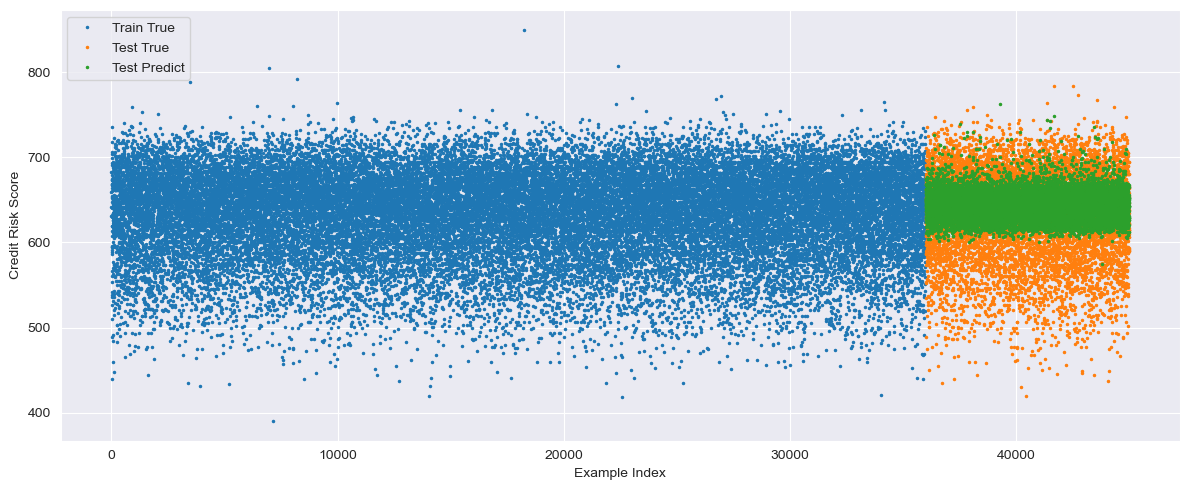

In [129]:
import numpy as np
import matplotlib.pyplot as plt

# 2) İndeksleri oluştur
n_train    = len(y_train)
n_test     = len(y_test)
idx_train  = np.arange(n_train)
idx_test   = np.arange(n_train, n_train + n_test)

# 3) Çiz
plt.figure(figsize=(12,5))
plt.plot(idx_train, y_train,  '.', markersize=3, label='Train True')
plt.plot(idx_test,  y_test,   '.', markersize=3, label='Test True')
plt.plot(idx_test,  y_preds_4,  '.', markersize=3, label='Test Predict')
plt.xlabel("Example Index")
plt.ylabel("Credit Risk Score")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [130]:
X_test.loc[7]

person_age                               24.0
person_gender                          female
person_education                  High School
person_income                         95550.0
person_emp_exp                              5
person_home_ownership                    RENT
loan_amnt                             35000.0
loan_intent                           MEDICAL
loan_int_rate                           11.11
loan_percent_income                      0.37
cb_person_cred_hist_length                4.0
previous_loan_defaults_on_file             No
Name: 7, dtype: object

In [138]:
idx = X_test.index[54]   

# 3) O satırı ham haliyle alın:
row_raw    = X_test.loc[[idx]]            # DataFrame, shape (1, n_features)
actual     = y_test.loc[idx]                 

# 4) Transformer ile dönüştürün:
row_transf = ct.transform(row_raw)            # shape (1, n_transformed_features)

# 5) Modelden tahmin alın:
predicted  = model_4.predict(row_transf).squeeze()  

# 6) Karşılaştırın:
print(f"Index: {idx}")
print(f"True Credit Score:    {actual}")
print(f"Predicted credit_score: {predicted:.2f}")
print(f"Hata (pred–real):       {predicted - actual:+.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Index: 44959
True Credit Score:    636
Predicted credit_score: 651.93
Hata (pred–real):       +15.93


In [139]:

input_data = {
    'person_age': 24.0,
    'person_gender': 'female',
    'person_education': 'High School',
    'person_income': 95550.0,
    'person_emp_exp': 5,
    'person_home_ownership': 'RENT',
    'loan_amnt': 35000.0,
    'loan_intent': 'MEDICAL',
    'loan_int_rate': 11.11,
    'loan_percent_income': 0.37,
    'cb_person_cred_hist_length': 3.0,            
    'previous_loan_defaults_on_file': 'No'
}

input_df = pd.DataFrame([input_data])

actual     = y_test.loc[7]                  # True credit score

X_proc = ct.transform(input_df)

# get predict
predicted = model_4.predict(X_proc).squeeze()

# Comprare
print(f"Seçilen indeks: 7")
print(f"Gerçek credit_score:    {actual}")
print(f"Tahmin edilen credit_score: {predicted:.2f}")
print(f"Hata (pred–real):       {predicted - actual:+.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Seçilen indeks: 7
Gerçek credit_score:    585
Tahmin edilen credit_score: 630.24
Hata (pred–real):       +45.24


### ✔ Model-4 Save .h5 format

In [140]:
model_4.save("credit_score_model.h5",overwrite=True)

### ✔ Model-4 Save .keras format

In [93]:
model_4.save("credit_score_model.keras")